In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import PetThermoTools as M
import Thermobar as pt
import pickle

sys.path.append(r'G:\My Drive\2022\GitHub\PetThermoTools\MELTS')

import time
import random
from tqdm.notebook import tqdm, trange

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
Data = pd.read_excel('CpxOpxPlag_lowP.xlsx')

In [3]:
with open('P_result_v120_full.obj', 'rb') as f:
    P_results = pickle.load(f)
    
with open('P_result_v102_full.obj', 'rb') as f:
    P_results_v102 = pickle.load(f)

In [4]:
P_bar = np.linspace(100,7500,38)/1000

Data['P_kbar_calc'] = np.zeros(len(Data['SiO2_Liq']))*np.nan
Data['P_kbar_calc_min'] = np.zeros(len(Data['SiO2_Liq']))*np.nan

Data['P_kbar_calc_v102'] = np.zeros(len(Data['SiO2_Liq']))*np.nan
Data['P_kbar_calc_v102_min'] = np.zeros(len(Data['SiO2_Liq']))*np.nan

for i in P_results:
    Loc = np.where(P_results[i]['Res_abc'][0,0,:] == np.nanmin(P_results[i]['Res_abc']))
    if Loc is not None:
        Data['P_kbar_calc'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
        Data['P_kbar_calc_min'].loc[int(i)] = np.nanmin(P_results_v102[i]['Res_abc'])
        
for i in P_results_v102:
    Loc = np.where(P_results_v102[i]['Res_abc'][0,0,:] == np.nanmin(P_results_v102[i]['Res_abc']))
    if Loc is not None:
        Data['P_kbar_calc_v102'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
        Data['P_kbar_calc_v102_min'].loc[int(i)] = np.nanmin(P_results_v102[i]['Res_abc'])

c:\users\matt gleeson\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_9768/2555367453.py:10: RuntimeWarning: All-NaN slice encountered
  Loc = np.where(P_results[i]['Res_abc'][0,0,:] == np.nanmin(P_results[i]['Res_abc']))
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_9768/2555367453.py:12: RuntimeWarning: Mean of empty slice
  Data['P_kbar_calc'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_9768/2555367453.py:13: RuntimeWarning: All-NaN slice encountered
  Data['P_kbar_calc_min'].loc[int(i)] = np.nanmin(P_results_v102[i]['Res_abc'])
C:\Users\MATTGL~1\AppData\Local\Temp/ipykernel_9768/2555367453.py:16: RuntimeWa

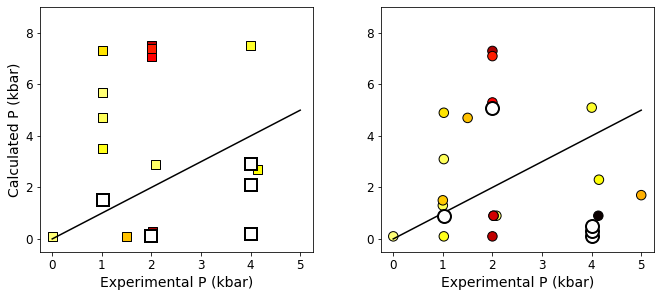

In [5]:
T_cut = 20

f, a = plt.subplots(1,2, figsize=(11, 4.5))
plt.subplots_adjust(hspace = 0.0, wspace = 0.25)

a[0].plot([0,5],[0,5], '-k')
s = a[0].scatter(Data['P_kbar'], Data['P_kbar_calc'], 80, c = Data['P_kbar_calc_min'],
                 edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 's')
a[0].plot(Data['P_kbar'][Data['P_kbar_calc_min'] < T_cut], 
          Data['P_kbar_calc'][Data['P_kbar_calc_min'] < T_cut], 'sw', 
          markersize = 12, markeredgecolor = 'k', mew = 2)
a[0].set_xlabel('Experimental P (kbar)')
a[0].set_ylabel('Calculated P (kbar)')
a[0].set_ylim([-0.5, 9])
#f.colorbar(s, ax=a[0], label='$\Delta$T ($^{o}$C)')

a[1].plot([0,5],[0,5], '-k')
a[1].scatter(Data['P_kbar'], Data['P_kbar_calc_v102'], 90, c = Data['P_kbar_calc_v102_min'], 
             edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 'o')
a[1].plot(Data['P_kbar'][Data['P_kbar_calc_v102_min'] < T_cut], 
          Data['P_kbar_calc_v102'][Data['P_kbar_calc_v102_min'] < T_cut], 
          'ow', markersize = 13, markeredgecolor = 'k', mew = 2)
a[1].set_xlabel('Experimental P (kbar)')
a[1].set_ylim([-0.5, 9])

plt.savefig('AB.pdf', dpi = 300)

Moore, G., and Carmichael, I.S.E. (1998)
PEM12-19


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


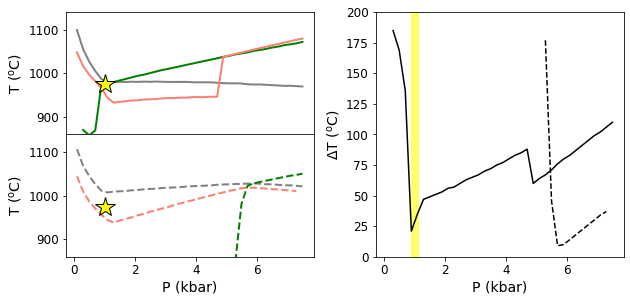

In [6]:
sample='33'

print(Data['Citation'].loc[int(sample)])
print(Data['Experiment'].loc[int(sample)])

figure_mosaic="""
AC
BC
"""
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10, 4.5), sharex=True)
plt.subplots_adjust(hspace = 0.0, wspace = 0.25)

axes['A'].plot(P_bar, P_results_v102[sample]['a_sat'][0,0,:], '-', linewidth = 2, color = [0.5,0.5,0.5])
axes['A'].plot(P_bar, P_results_v102[sample]['b_sat'][0,0,:], '-g', linewidth = 2)
axes['A'].plot(P_bar, P_results_v102[sample]['c_sat'][0,0,:], '-', linewidth = 2, color = 'salmon')
axes['A'].plot(Data['P_kbar'].loc[int(sample)], Data['T_K'].loc[int(sample)]-273.15, '*k', 
               mfc = 'yellow', ms = 20)
axes['A'].set_ylabel('T ($^{o}$C)')
axes['A'].set_ylim([860, 1140])

axes['B'].plot(P_bar, P_results[sample]['a_sat'][0,0,:], '--', linewidth = 2, color = [0.5,0.5,0.5])
axes['B'].plot(P_bar, P_results[sample]['b_sat'][0,0,:], '--g', linewidth = 2)
axes['B'].plot(P_bar, P_results[sample]['c_sat'][0,0,:], '--', linewidth = 2, color = 'salmon')
axes['B'].plot(Data['P_kbar'].loc[int(sample)], Data['T_K'].loc[int(sample)]-273.15, '*k', 
               mfc = 'yellow', ms = 20)
axes['B'].set_ylabel('T ($^{o}$C)')
axes['B'].set_xlabel('P (kbar)')
axes['B'].set_ylim([860, 1140])


axes['C'].plot([Data['P_kbar'].loc[int(sample)],Data['P_kbar'].loc[int(sample)]],
              [0,200], '-', alpha = 0.6, lw = 8, c = 'yellow')
axes['C'].plot(P_bar, P_results_v102[sample]['Res_abc'][0,0,:], '-k')
axes['C'].plot(P_bar, P_results[sample]['Res_abc'][0,0,:], '--k')
axes['C'].set_ylabel('$\Delta$T ($^{o}$C)')
axes['C'].set_xlabel('P (kbar)')
axes['C'].set_ylim([0,200])

plt.savefig('CDE.pdf', dpi = 300)

In [8]:
Data.to_excel('DataCheck.xlsx')

,Phase,Citation,Experiment,Sample_ID_Liq,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,...,P2O5_Liq,H2O_Liq,DeltaNNO_MELTS,logfo2,T_K,P_kbar,P_kbar_calc,P_kbar_calc_min,P_kbar_calc_v102,P_kbar_calc_v102_min
0,Cpx-Plag-Opx-Liq,Hamada2008_notinLEPR,Hamada911NNOp1,0,51.600000,1.060000,16.300000,11.800000,0.160000,6.500000,...,0.000000,1.600000,1.131101,-7.276066,1403.15,4.000,0.2,18.0,0.1,18.0
1,Cpx-Plag-Opx-Liq,Hamada2008_notinLEPR,Hamada950NNOp1,1,54.200000,0.870000,17.500000,8.480000,0.120000,6.420000,...,0.000000,2.700000,0.133965,-8.661371,1373.15,4.000,2.1,14.0,0.3,14.0
2,Cpx-Plag-Opx-Liq,Kraw2013_notinLEPR,Kraw2041c-141,2,61.100000,0.730000,15.040000,3.800000,0.060000,2.300000,...,0.000000,13.457296,1.079486,-10.281122,1203.15,2.080,2.9,23.0,0.9,23.0
3,Cpx-Plag-Opx-Liq,Firth2019_notinLEPR,Firth2Run 47,3,61.473470,0.671014,19.129961,8.175739,0.142225,1.265757,...,0.201204,5.000000,0.196014,-11.694465,1173.15,5.000,NaN,56.0,1.7,56.0
4,Cpx-Plag-Opx-Liq,Berndt2005_notinLEPR,Berndt35,4,57.530000,1.000000,19.240000,6.430000,0.160000,2.990000,...,0.260000,5.210000,3.741353,-6.480000,1273.15,2.050,NaN,NaN,NaN,NaN
5,Cpx-Plag-Opx-Liq,Berndt2005_notinLEPR,Berndt48,5,63.490000,0.860000,17.210000,5.240000,0.300000,1.820000,...,0.150000,5.250000,3.731801,-7.290000,1223.15,2.030,NaN,NaN,NaN,NaN
6,Cpx-Plag-Opx-Liq,Pichavent2007_notinLEPR,Pichav4_6,6,56.500000,1.190000,19.200000,8.430000,0.150000,3.610000,...,0.000000,2.200000,-0.718599,-10.200000,1323.15,4.002,7.5,32.0,5.1,32.0
7,Cpx-Plag-Opx-Liq,Pichavent2007_notinLEPR,Pichav3_6,7,54.600000,1.220000,17.700000,9.260000,0.180000,4.590000,...,0.000000,3.500000,0.001729,-8.900000,1365.15,4.015,2.9,17.0,0.5,17.0
8,Cpx-Plag-Opx-Liq,Pichavent2007_notinLEPR,Pichav6_5,8,52.600000,1.140000,16.600000,9.600000,0.300000,6.540000,...,0.000000,1.600000,-0.903850,-9.000000,1428.15,4.147,2.7,37.0,2.3,37.0
9,Cpx-Plag-Opx-Liq,Mandler2013_notinLEPR,Mandle272Ja-1,9,69.600000,0.610000,16.000000,2.980000,0.130000,0.720000,...,0.000000,3.000000,0.038515,-11.495757,1193.15,1.000,NaN,NaN,NaN,NaN
